In [132]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [35]:
def load_pickle(path):
    with open(path, 'rb') as pickle_file:
        loss = pickle.load(pickle_file)
    return loss

In [133]:
runs = ['l1_loss_scale_fbpinn_3_10', 'l1_loss_scale_fbpinn_3_30', 'l1_loss_scale_fbpinn_3_50', 'l1_loss_scale_fbpinn_3_100']
# runs = ['l1_loss_scale_fbpinn_3_10', 'l1_loss_scale_fbpinn_3_30', 'l1_loss_scale_fbpinn_3_50']

def plot_loss(args):
    fig = plt.figure(figsize= (6, 4))
    for run in args:
        loss = load_pickle(run)
        x = [x for x in range(len(loss))]
        plt.plot(x, loss, label ='nr_subdomains: {}'.format(run.split('_')[-1]) )
    plt.legend()
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel(r"$L_1$ Loss")
    plt.title(r'(a) FBPINN for $\omega_i$ =  2, 4, 8')
    plt.savefig("l1_loss_fbpinn_3.pdf")
    plt.show()

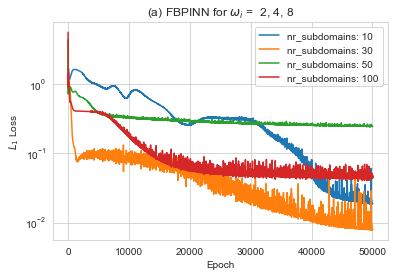

In [134]:
plot_loss(runs)

In [135]:
import pandas as pd
runs = ['l1_loss_scale_fbpinn_5_10', 'l1_loss_scale_fbpinn_5_20', 'l1_loss_scale_fbpinn_5_30', 'l1_loss_scale_fbpinn_5_40']

# runs = runs + runs_pinn
# runs = ['l1_loss_scale_fbpinn_3_10', 'l1_loss_scale_fbpinn_3_30', 'l1_loss_scale_fbpinn_3_50']

def plot_loss(args):
    fig = plt.figure(figsize= (6, 4))
    for run in args:
        loss = load_pickle(run)
        smoothing_factor = 0.4
        loss = pd.Series(loss).ewm(alpha=1-smoothing_factor).mean()
        x = [x for x in range(len(loss))]
        plt.plot(x, loss, label = 'nr_subdomains: {}'.format(run.split('_')[-1]), alpha = 0.9)
    plt.legend()
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel(r"$L_1$ Loss")
    plt.title(r'(c) FBPINN for $\omega_i$ =  2, 4, 8, 16, 32')
    plt.savefig("l1_loss_fbpinn_5.pdf")
    plt.show()

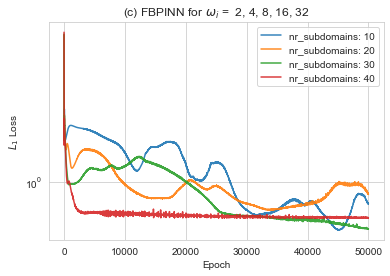

In [136]:
plot_loss(runs)

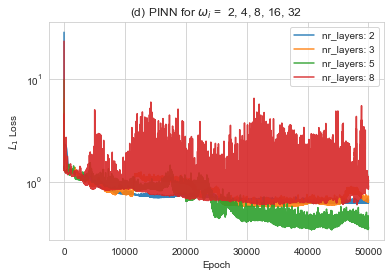

In [137]:
runs_pinn = ['l1_loss_scale_pinn_5_2', 'l1_loss_scale_pinn_5_3', 'l1_loss_scale_pinn_5_5', 'l1_loss_scale_pinn_5_8']

# test_string = "stringcharThatChange_myname"
# print(test_string.split('_')[1]

def plot_loss(args):
    fig = plt.figure(figsize= (6, 4))
    for run in args:
        loss = load_pickle(run)
        smoothing_factor = 0.4
        loss = pd.Series(loss).ewm(alpha=1-smoothing_factor).mean()
        x = [x for x in range(len(loss))]
        plt.plot(x, loss, label = 'nr_layers: {}'.format(run.split('_')[-1]), alpha = 0.9)
    plt.legend()
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel(r"$L_1$ Loss")
    plt.title(r'(d) PINN for $\omega_i$ =  2, 4, 8, 16, 32')
    plt.savefig("l1_loss_pinn_5.pdf")
    plt.show()


plot_loss(runs_pinn)

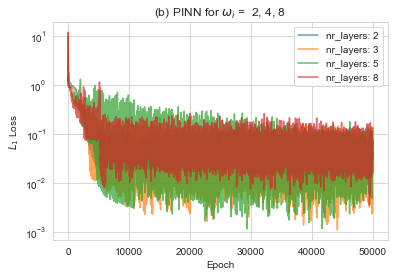

In [138]:
runs_pinn = ['l1_loss_scale_pinn_3_2', 'l1_loss_scale_pinn_3_3', 'l1_loss_scale_pinn_3_5', 'l1_loss_scale_pinn_3_8']

def plot_loss(args):
    fig = plt.figure(figsize= (6, 4))
    for run in args:
        loss = load_pickle(run)
        smoothing_factor = 0.4
        loss = pd.Series(loss).ewm(alpha=1-smoothing_factor).mean()
        x = [x for x in range(len(loss))]
        plt.plot(x, loss, label = 'nr_layers: {}'.format(run.split('_')[-1]), alpha = 0.7)
    plt.legend()
    plt.title(r'(b) PINN for $\omega_i$ =  2, 4, 8')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel(r"$L_1$ Loss")
    plt.savefig("l1_loss_pinn_3.pdf")
    plt.show()


plot_loss(runs_pinn)